In [1]:
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
import geopandas as gpd

In [3]:
plt.style.use('ggplot')

In [4]:
from dahiti import dahiti

In [5]:
credentials = dict(username='myuser', password='mypass')

## Query API

In [6]:
results = dahiti.list_targets(basin='Volta', **credentials)
results

[{'id': '943',
  'latitude': '11.5600',
  'location': None,
  'longitude': '-0.7520',
  'target_name': 'Bagre, Reservoir'},
 {'id': '97',
  'latitude': '6.6500',
  'location': None,
  'longitude': '-0.2513',
  'target_name': 'Volta, Lake'}]

## Explore results with Geopandas

In [7]:
gdf = dahiti.results_to_geodataframe(results)
gdf

,location,target_name,geometry
id,,,
943,None,"Bagre, Reservoir",POINT (-0.752 11.56)
97,None,"Volta, Lake",POINT (-0.2513 6.65)


In [8]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

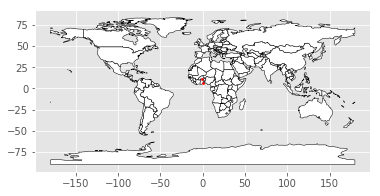

In [9]:
base = world.plot(color='white', edgecolor='black')
gdf.plot(ax=base, marker='o', color='red', markersize=5) ;

## Download data

In [10]:
data = dahiti.download(dahiti_id=943, **credentials)

## Plot data with Pandas

In [11]:
df = dahiti.data_to_dataframe(data)

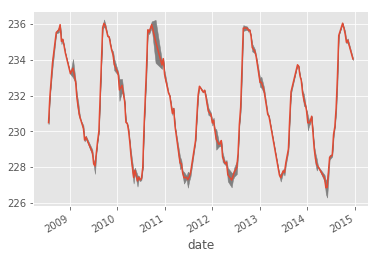

In [12]:
height = df['height']
error = df['error']
height.plot()
plt.fill_between(df.index, (height - error), (height + error), color='grey')